# EDA and Feature engineering

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

## Load dataset

In [4]:
data_path = os.path.join(os.path.dirname(os.getcwd()), "Data", "clean_data.csv")
data = pd.read_csv(data_path)

In [5]:
data.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,41,880.0,129.0,322.0,126.0,8.3252,near bay,452600
1,21,7099.0,1106.0,2401.0,1138.0,8.3014,near bay,358500
2,52,1467.0,190.0,496.0,177.0,7.2574,near bay,352100
3,52,1274.0,235.0,558.0,219.0,5.6431,near bay,341300
4,52,1627.0,280.0,565.0,259.0,3.8462,near bay,342200


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.00000
total_rooms,20640.0,2553.639814,1719.513128,2.0000,1447.7500,2127.0000,3148.00000,8853.52000
total_bedrooms,20640.0,522.332897,343.729592,1.0000,297.0000,435.0000,643.25000,1739.00000
population,20640.0,1386.547460,905.816278,3.0000,787.0000,1166.0000,1725.00000,4573.66000
households,20640.0,486.495979,314.698362,1.0000,280.0000,409.0000,605.00000,1581.00000
median_income,20640.0,3.824845,1.722915,0.4999,2.5634,3.5348,4.74325,8.94675
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.00000


our target feature has a minimum of 14,999 and max of 500,000. A standard deviation of 115,395.

This should be taken into consideration when interpreting the result of our predictive model.

# EDA on Numerical features

In [7]:
def box_plot(df):
    num_features  =len(df.columns)
    num_rows = (num_features +1)//2

    fig, axes = plt.subplots(ncols = 2, nrows = num_rows, figsize = (10,6))
    axes = axes.flatten()

    for index, feature in enumerate(df.columns):
        ax = axes[index]
        sns.boxplot(df[feature], ax = ax, orient = 'h')

    plt.suptitle("Box plot of numerical features")
    plt.tight_layout()
    plt.show()

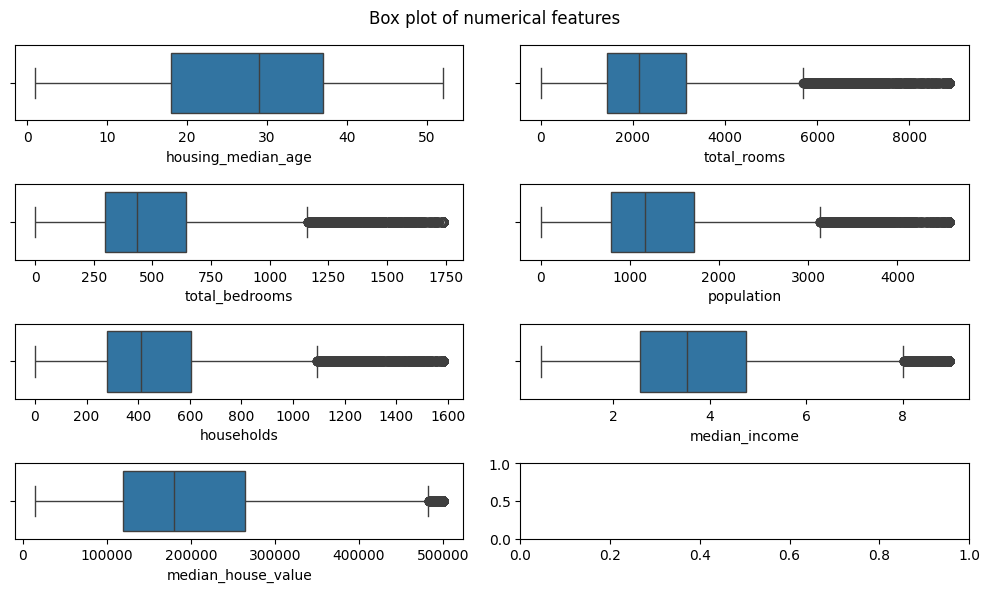

In [8]:
numerical_df  =data.select_dtypes(exclude = 'object')
box_plot(numerical_df)

## create scatter plot

In [11]:
def scatter_plot(df, target):
    num_features  =len(df.columns)
    num_rows = (num_features +1)//2

    fig, axes = plt.subplots(ncols = 2, nrows = num_rows, figsize = (10,10))
    axes = axes.flatten()

    for index, feature in enumerate(df.columns):
        ax = axes[index]
        sns.scatterplot(x = df[feature], y = df[target], ax = ax)

    plt.suptitle("scatter plot of numerical features")
    plt.tight_layout()
    plt.show()

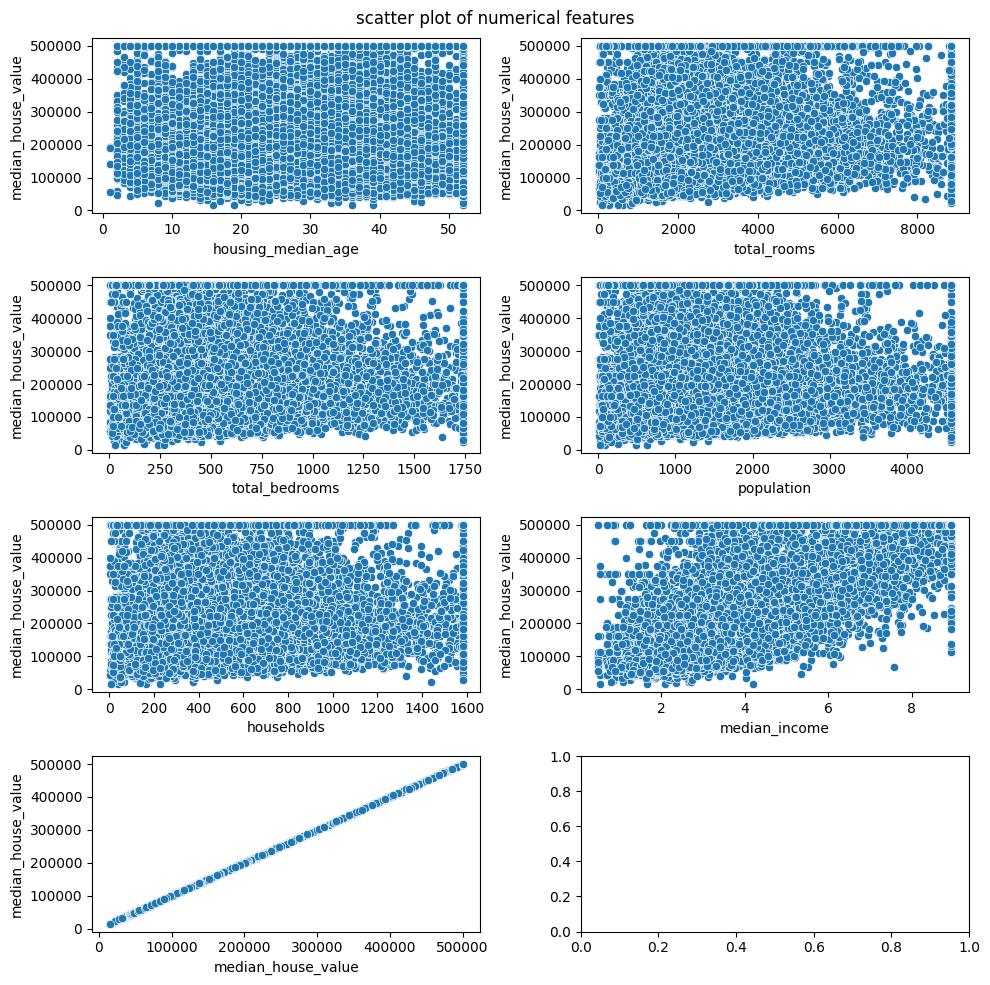

In [12]:
scatter_plot(numerical_df, "median_house_value")

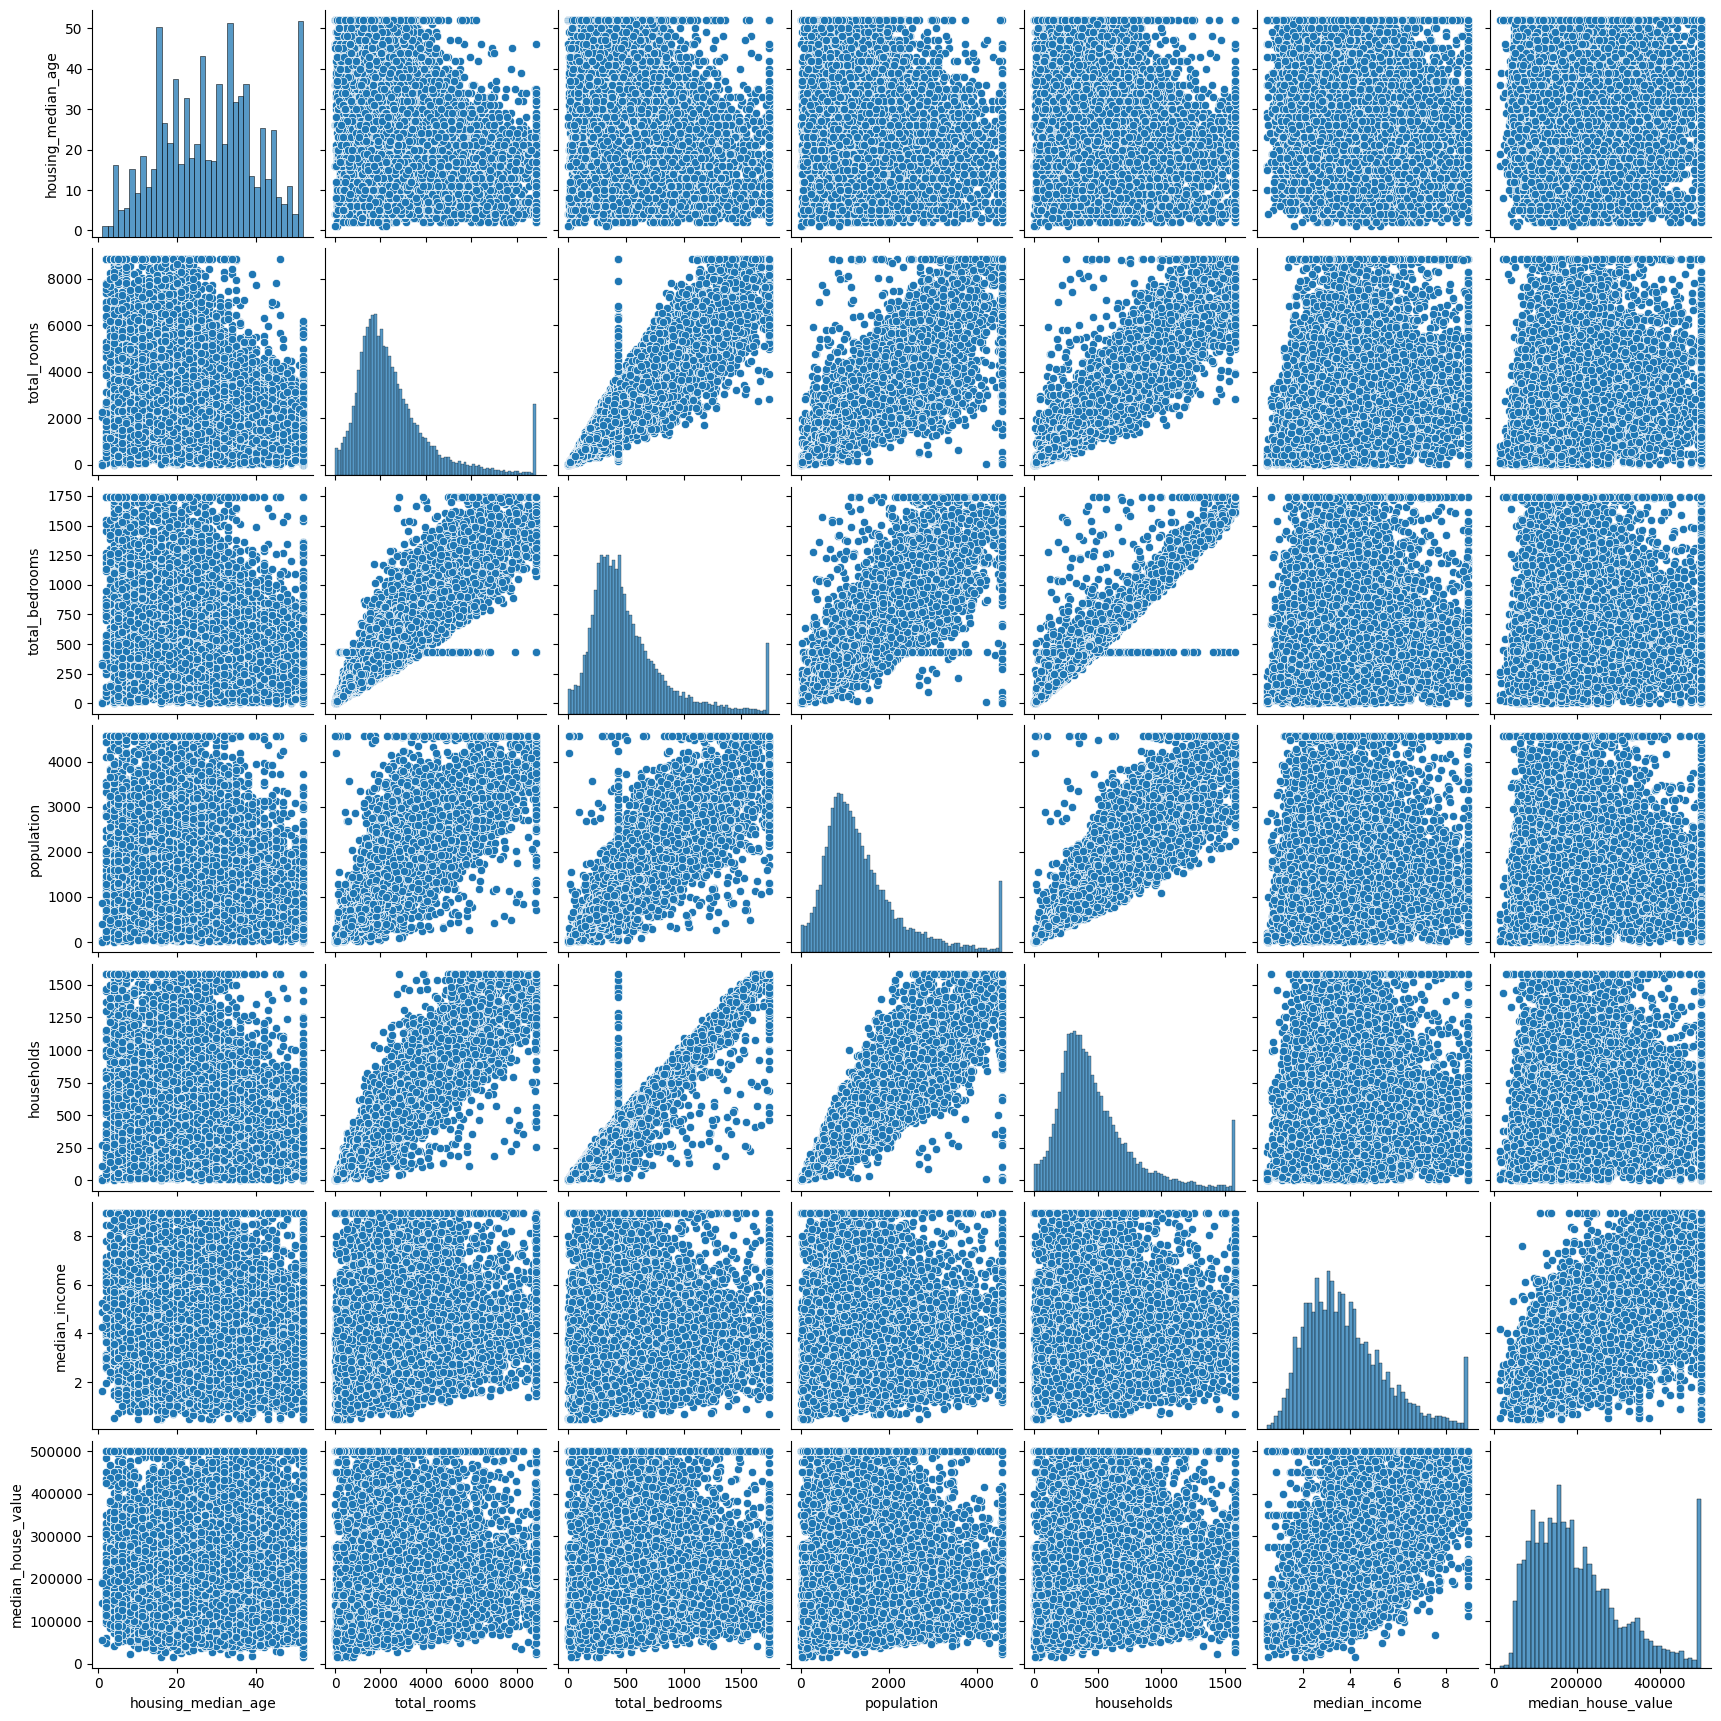

In [13]:
sns.pairplot(numerical_df)

In [22]:
def plot_corr(df):
    corr_matrix  =df.corr()
    mask = np.triu(np.ones_like(df.corr(), dtype  =bool))

    sns.heatmap(corr_matrix, cmap = "viridis", annot = True, fmt = ".2f", mask = mask)
    plt.title("correlation for numerical features")
    plt.show()

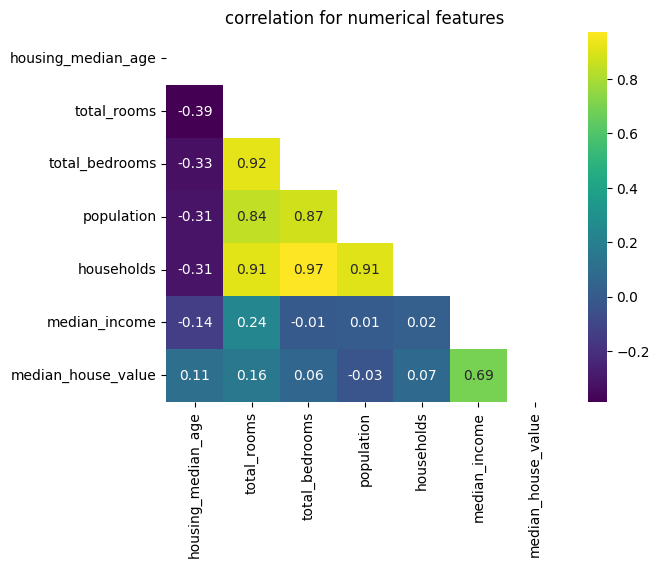

In [23]:
plot_corr(numerical_df)

In [24]:
data.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,41,880.0,129.0,322.0,126.0,8.3252,near bay,452600
1,21,7099.0,1106.0,2401.0,1138.0,8.3014,near bay,358500
2,52,1467.0,190.0,496.0,177.0,7.2574,near bay,352100
3,52,1274.0,235.0,558.0,219.0,5.6431,near bay,341300
4,52,1627.0,280.0,565.0,259.0,3.8462,near bay,342200


In [25]:
data["population_per_households"] = data["population"]/data["households"]
data["rooms_per_household"]  = data["total_rooms"]/data["households"]
data["bed_rooms_per_household"] = data["total_bedrooms"]/data["households"]
data["population_per_bedrooms"] = data["population"]/data["total_bedrooms"]
data["rooms_per_bedrooms"] = data["total_rooms"]/data["total_bedrooms"]

In [26]:
data = data.drop(["total_rooms", "total_bedrooms", "households"], axis =1)

In [27]:
data.head()

,housing_median_age,population,median_income,ocean_proximity,median_house_value,population_per_households,rooms_per_household,bed_rooms_per_household,population_per_bedrooms,rooms_per_bedrooms
0,41,322.0,8.3252,near bay,452600,2.555556,6.984127,1.023810,2.496124,6.821705
1,21,2401.0,8.3014,near bay,358500,2.109842,6.238137,0.971880,2.170886,6.418626
2,52,496.0,7.2574,near bay,352100,2.802260,8.288136,1.073446,2.610526,7.721053
3,52,558.0,5.6431,near bay,341300,2.547945,5.817352,1.073059,2.374468,5.421277
4,52,565.0,3.8462,near bay,342200,2.181467,6.281853,1.081081,2.017857,5.810714


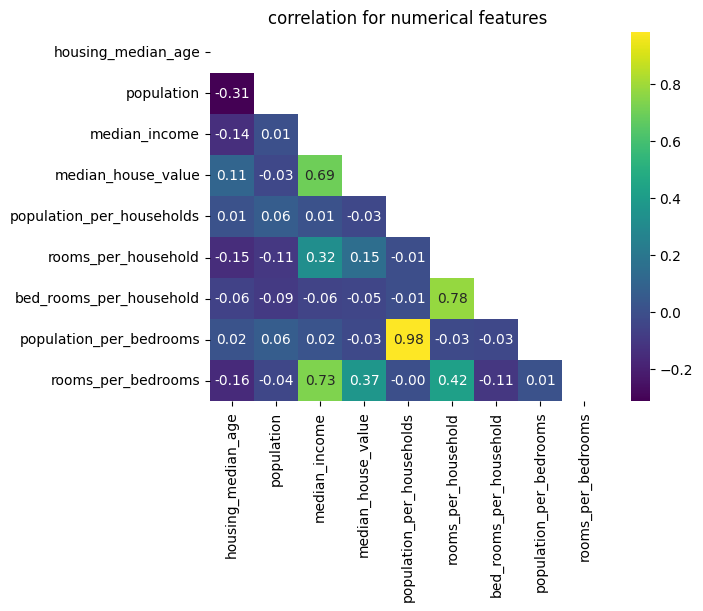

In [29]:
numerical_df  =data.select_dtypes(exclude = 'object')
plot_corr(numerical_df)

# EDA on categorical features

In [30]:
cat_df =data.select_dtypes(include = 'object')

In [31]:
cat_df.head()

,ocean_proximity
0,near bay
1,near bay
2,near bay
3,near bay
4,near bay


In [ ]:
plt.figure(figsize = (10,6))
sns.countplot(data = cat_df, x  ="ocean_proximity")
plt.title("count plot for categorical features")
plt.xlabel("categorical features")
plt.xticks(rotation = 45)
plt.show()

AttributeError: Figure.set() got an unexpected keyword argument 'fize'